# Oops... Nothing Here..  So, you are on your own this time.

# Data 

In [4]:
!pip install wget
import wget

Crawling and parsing was done in Python Shell

In [5]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree


## Machine Learning
import sklearn
import sklearn.metrics as metrics

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
hotelDf = pandas.read_csv('reviews.csv')
hotelDf.columns=['filePath','hotelName','reviewColumn','ratingScore','groundTruth']

In [7]:
hotelDf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth
0,data\ca\1539047\2709191\151926120.html,The Key Motel,"""Stayed here with my family, we got 4 rooms bo...",5,positive
1,data\ca\1539047\2709191\220168607.html,The Key Motel,"""My family and I spent 2 nights at Key Motel d...",5,positive
2,data\ca\1539047\2709191\296606717.html,The Key Motel,"""The owners of the Key Motel where very welcom...",4,positive
3,data\ca\1539047\2709191\301203251.html,The Key Motel,"""I have stayed at this place twice. Its an old...",4,positive
4,data\ca\1539047\2709191\601608159.html,The Key Motel,"""This motel is nice small town suprise.My room...",3,negative


In [0]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pandas.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [0]:
reviews = hotelDf['reviewColumn'].values

In [10]:
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])

100%|██████████| 3833/3833 [00:04<00:00, 857.81it/s]


In [11]:
reviewDF.head()

,reviewCol,vader
0,"""Stayed here with my family, we got 4 rooms bo...",0.9895
1,"""My family and I spent 2 nights at Key Motel d...",0.9847
2,"""The owners of the Key Motel where very welcom...",0.9538
3,"""I have stayed at this place twice. Its an old...",0.9682
4,"""This motel is nice small town suprise.My room...",0.8750


### Data Preprocessing
1. Find Topk words (No preprocessing steps now)
2. Reconstruct the above dataframe into CSV style..

In [0]:
def dataFrameTransformation(hotelDf, reviewDF, k=500):
    reviews = reviewDF['reviewCol'].values
    
    stop = set(stopwords.words('english'))
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [0]:
topk, finaldf = dataFrameTransformation(hotelDf, reviewDF, k=500)

In [14]:
finaldf.head()

,hotelName,ratingScore,groundTruth,reviewCol,vader,room,hotel,stay,clean,staff,breakfast,would,good,rooms,great,friendly,stayed,nice,one,night,comfortable,desk,well,area,front,place,bed,like,time,pool,nthe,could,get,back,also,helpful,service,inn,check,even,...,park,maintained,efficient,name,party,tired,heat,screen,trying,site,gym,behind,walked,welcome,disgusting,floors,four,closed,facility,whole,table,star,machine,stains,window,online,conference,saturday,certainly,reason,muffins,absolutely,courteous,received,yogurt,weeks,hilton,half,later,event
0,The Key Motel,5,positive,"""Stayed here with my family, we got 4 rooms bo...",0.9895,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Key Motel,5,positive,"""My family and I spent 2 nights at Key Motel d...",0.9847,1,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Key Motel,4,positive,"""The owners of the Key Motel where very welcom...",0.9538,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Key Motel,4,positive,"""I have stayed at this place twice. Its an old...",0.9682,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,The Key Motel,3,negative,"""This motel is nice small town suprise.My room...",0.8750,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Q1

###(a)

In [0]:
AvgDF=finaldf[['hotelName','ratingScore','vader']].groupby('hotelName').mean()

In [16]:
AvgDF.head()

,ratingScore,vader
hotelName,,
All Seasons Motel,2.40,0.273755
Best Western Plus Cambridge Hotel,4.21,0.775674
Best Western Plus Waterloo,3.82,0.648132
Cambridge Hotel and Conference Centre,3.90,0.712337
Comfort Inn,3.75,0.681760


###(b)

In [0]:
#Rank by Average Rating Score
ratingRankDF=AvgDF.iloc[np.argsort(AvgDF['ratingScore']) [::-1]]

In [18]:
ratingRankDF.head()

,ratingScore,vader
hotelName,,
Forest Hill Bed and Breakfast,4.980000,0.963054
Green Gables Guest House,4.800000,0.968020
"Homewood Suites by Hilton Waterloo/St. Jacobs, Ontario, Canada",4.730000,0.874032
Executive Guest Houses &amp; Suites Boardwalk Homes,4.661538,0.915405
Delta Hotels by Marriott Waterloo,4.490000,0.854793


In [19]:
#last five using rating Ranking
ratingRankDF.iloc[-5:]

,ratingScore,vader
hotelName,,
Forest Plaza Motel,2.100000,0.166130
Fairway Inn &amp; Suites,2.066667,0.140727
Mayflower Motel,2.000000,-0.400933
Victoria Motel,1.900000,-0.011350
Howard Johnson by Wyndham Kitchener Conestoga,1.480000,-0.157544


In [0]:
#Rank by Average Vader Score
vaderRankDF=AvgDF.iloc[np.argsort(AvgDF['vader']) [::-1]]

In [21]:
vaderRankDF.head()

,ratingScore,vader
hotelName,,
Green Gables Guest House,4.800000,0.968020
Forest Hill Bed and Breakfast,4.980000,0.963054
Executive Guest Houses &amp; Suites Boardwalk Homes,4.661538,0.915405
Maplewood Motel,3.818182,0.892882
"Homewood Suites by Hilton Waterloo/St. Jacobs, Ontario, Canada",4.730000,0.874032


In [22]:
#last five using Vader Ranking
vaderRankDF.iloc[-5:]

,ratingScore,vader
hotelName,,
Fairway Inn &amp; Suites,2.066667,0.140727
Newburg Inn,2.750000,0.066690
Victoria Motel,1.900000,-0.011350
Howard Johnson by Wyndham Kitchener Conestoga,1.480000,-0.157544
Mayflower Motel,2.000000,-0.400933


The ranking using rating yields pretty much the similar result for top 5 hotels, except one hotel ranked differently under two metrics. 
The ranking for bottom 5 hotels under the two metrics are very similar as well with one difference. 

##Q2

###(a)


In [0]:
#We are only intereseted in this three column for overall analysis
itemAnalysisDf = finaldf[['reviewCol','groundTruth','vader']]

In [0]:
def getTopK(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)
    return topk

In [0]:
topkGroundPos = getTopK(df=itemAnalysisDf, k=50, label_value='positive')

In [26]:
topkGroundPos

[('clean', 1522),
 ('breakfast', 1428),
 ('great', 1219),
 ('good', 1015),
 ('friendly', 914),
 ('nice', 848),
 ('would', 832),
 ('comfortable', 770),
 ('stayed', 758),
 ('well', 663),
 ('area', 609),
 ('one', 543),
 ('night', 503),
 ('helpful', 502),
 ('place', 479),
 ('pool', 452),
 ('desk', 450),
 ('time', 438),
 ('nthe', 424),
 ('front', 419),
 ('service', 414),
 ('bed', 407),
 ('location', 406),
 ('recommend', 382),
 ('also', 378),
 ('inn', 369),
 ('like', 344),
 ('restaurant', 344),
 ('excellent', 344),
 ('hot', 341),
 ('close', 334),
 ('back', 333),
 ('definitely', 332),
 ('beds', 324),
 ('get', 322),
 ('quiet', 319),
 ('really', 317),
 ('could', 312),
 ('check', 300),
 ('best', 298),
 ('coffee', 296),
 ('free', 290),
 ('family', 280),
 ('next', 279),
 ('food', 276),
 ('day', 267),
 ('everything', 267),
 ('enjoyed', 265),
 ('even', 263),
 ('home', 254)]

In [0]:
topkGroundNeg = getTopK(df=itemAnalysisDf, k=50, label_value='negative')

In [28]:
topkGroundNeg

[('would', 747),
 ('one', 592),
 ('night', 590),
 ('breakfast', 576),
 ('clean', 525),
 ('desk', 481),
 ('good', 474),
 ('front', 461),
 ('like', 424),
 ('stayed', 392),
 ('place', 385),
 ('bed', 375),
 ('could', 375),
 ('get', 357),
 ('back', 322),
 ('bathroom', 314),
 ('time', 313),
 ('door', 310),
 ('even', 306),
 ('nice', 292),
 ('told', 291),
 ('area', 285),
 ('check', 277),
 ('booked', 276),
 ('nthe', 273),
 ('never', 270),
 ('said', 264),
 ('pool', 254),
 ('dirty', 249),
 ('two', 243),
 ('friendly', 242),
 ('also', 241),
 ('well', 238),
 ('first', 234),
 ('floor', 225),
 ('asked', 225),
 ('shower', 225),
 ('people', 218),
 ('old', 215),
 ('inn', 214),
 ('got', 212),
 ('went', 212),
 ('beds', 211),
 ('day', 205),
 ('hot', 205),
 ('next', 204),
 ('water', 201),
 ('price', 197),
 ('morning', 197),
 ('great', 193)]

Some noun appeared as frequent words in both positive and negative reviews. We would need the phrase to determine what made it a good or a bad review. 

###(b)

In [0]:
tagger = PerceptronTagger()
# Part of Speech Tagging
# Google: https://en.wikipedia.org/wiki/Part-of-speech_tagging
pos_tag = tagger.tag

In [0]:
# This grammar is described in the paper by S. N. Kim,
# T. Baldwin, and M.-Y. Kan.
# Evaluating n-gram based evaluation metrics for automatic
# keyphrase extraction.
# Technical report, University of Melbourne, Melbourne 2010.
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
# Create phrase tree
chunker = nltk.RegexpParser(grammar)

In [0]:
# Noun Phrase Extraction Support Functions
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopwords)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

In [0]:
# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [0]:
# Revise the previous dataframe transform function...
def newDataFrameTransformation(hotelDf, reviewDF, k=500):
    reviews = reviewDF['reviewCol'].as_matrix()
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
        counter.update(flatten([word
                        for word 
                        in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review))))]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [34]:
topk_phrase, finaldf_phrase = newDataFrameTransformation(hotelDf, reviewDF)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
#finaldf_phrase.head()

In [0]:
def getTopK_phrase(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    #stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    #stop.add('hotel')
    #stop.add('room')
    #stop.add('rooms')
    #stop.add('stay')
    #stop.add('staff')
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update(flatten([word for word in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review))))]))
    topk = counter.most_common(k)
    return topk

In [0]:
NPAnalysisDf = finaldf_phrase[['reviewCol','groundTruth','vader']]

In [38]:
topkGroundPos_phrase = getTopK_phrase(df=NPAnalysisDf, k=50, label_value='positive')
topkGroundPos_phrase

[('front desk', 160),
 ('owen sound', 92),
 ('hot tub', 72),
 ('great place', 54),
 ('front desk staff', 54),
 ('comfort inn', 51),
 ('great stay', 49),
 ('friendli staff', 48),
 ('st jacob', 47),
 ('complimentari breakfast', 44),
 ('farmer market', 44),
 ('continent breakfast', 41),
 ('comfort bed', 40),
 ('next time', 37),
 ('nthe room', 36),
 ('clean staff', 35),
 ('clean room', 35),
 ('holiday inn', 34),
 ('forest hill', 33),
 ('knight inn', 32),
 ('first time', 31),
 ('free breakfast', 30),
 ('holiday inn express', 30),
 ('next morn', 29),
 ('st jacob market', 29),
 ('nice hotel', 28),
 ('great locat', 28),
 ('breakfast buffet', 27),
 ('park lot', 26),
 ('hotel staff', 25),
 ('breakfast area', 25),
 ('tim horton', 25),
 ('homewood suit', 25),
 ('great hotel', 24),
 ('night stay', 24),
 ('hotel room', 24),
 ('pool area', 24),
 ('good valu', 23),
 ('boardwalk home', 23),
 ('good locat', 22),
 ('queen bed', 22),
 ('great valu', 22),
 ('clean bed', 21),
 ('next year', 21),
 ('best wes

In [39]:
topkGroundNeg_phrase = getTopK_phrase(df=NPAnalysisDf, k=50, label_value='negative')
topkGroundNeg_phrase

[('front desk', 192),
 ('credit card', 54),
 ('hot tub', 49),
 ('park lot', 43),
 ('owen sound', 39),
 ('front desk staff', 33),
 ('hot water', 29),
 ('comfort inn', 28),
 ('hotel room', 27),
 ('next morn', 27),
 ('night stay', 26),
 ('continent breakfast', 25),
 ('next day', 25),
 ('first night', 25),
 ('non smoke room', 24),
 ('free breakfast', 24),
 ('smoke room', 24),
 ('nthe room', 23),
 ('custom servic', 23),
 ('holiday inn', 22),
 ('bathroom door', 21),
 ('knight inn', 20),
 ('second night', 19),
 ('queen bed', 18),
 ('air condition', 18),
 ('first time', 18),
 ('first room', 17),
 ('breakfast area', 17),
 ('hockey team', 17),
 ('next time', 16),
 ('clean staff', 16),
 ('staff member', 16),
 ('breakfast room', 15),
 ('second floor', 15),
 ('differ room', 15),
 ('complimentari breakfast', 15),
 ('hotel manag', 14),
 ('new room', 14),
 ('patio door', 14),
 ('first floor', 13),
 ('larg group', 13),
 ('pool area', 13),
 ('hotel staff', 13),
 ('tim horton', 13),
 ('coffe maker', 13),

It is more clear than just analyzing the frequent word. The noun phrase like free breakfast gives more information than just word like breakfast. "Bed bug" in noun phrase is clearly a negative review, it would not appear in positive review. However, the rest of noun phrase for negative reviews, it is as informative as positive phrase. 

##Q3

###(a)

In [0]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(finaldf[label_column], finaldf[word[0]])])
    miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [41]:
miScoredf = getMI(topk, finaldf)
miScoredf.head(50)

,Word,MI Score
109,dirty,0.048597
9,great,0.041146
75,told,0.025253
10,friendly,0.021922
3,clean,0.020496
255,smoke,0.020220
103,old,0.019121
172,smell,0.019069
451,stained,0.018756
64,never,0.018506


###(b)

In [0]:
# get Top K mutual information terms from the dataframe
def getMI_phrase(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
            miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Phrase','MI Score']
    return miScoredf

In [43]:
miScoredf_phrase =getMI_phrase(topk_phrase, finaldf_phrase)
miScoredf_phrase.head(50)

,Phrase,MI Score
11,credit card,0.008643
0,front desk,0.004688
21,great stay,0.004651
9,great place,0.003416
44,forest hill,0.003341
47,non smoke room,0.003156
59,bathroom door,0.002829
42,first night,0.002720
117,differ room,0.002681
5,park lot,0.002548


##Q4

###(a)

In [0]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['groundTruth']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px*py))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [0]:
def pmiIndivCal(df,x,gt, label_column='groundTruth'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(px*py))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi

In [0]:
def pmiForAllCal(df, label_column='groundTruth', topk=topk):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pandas.DataFrame(pmilist)
    pmiposlist = pandas.DataFrame(pmiposlist)
    pmineglist = pandas.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [47]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf)

100%|██████████| 500/500 [00:16<00:00, 30.18it/s]


In [48]:
#Sorted top pmi words for positive reviews
pmiposlist.sort_values('pmi',ascending=0).head(50)

,word,pmi
398,dave,0.439430
453,eleanora,0.439430
425,fantastic,0.402158
175,wonderful,0.383688
191,perfect,0.379611
320,delicious,0.377736
262,loved,0.372738
102,enjoyed,0.367399
164,amazing,0.362240
65,excellent,0.340465


In [49]:
#Sorted top pmi words for negative reviews
pmineglist.sort_values('pmi',ascending=0).head(50)

,word,pmi
451,stained,1.020354
474,disgusting,0.991400
446,broken,0.978390
109,dirty,0.978390
391,worst,0.964164
483,stains,0.961986
255,smoke,0.946948
350,walls,0.938649
349,toilet,0.892548
366,credit,0.882154


###(b)

In [50]:
pmiposlist_phrase, pmineglist_phrase, pmidf_phrase = pmiForAllCal(finaldf_phrase, topk = topk_phrase)

100%|██████████| 500/500 [00:15<00:00, 32.21it/s]


In [51]:
#Sorted top pmi noun phrase for positive reviews
pmiposlist_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
120,full kitchen,0.439430
303,excel breakfast,0.439430
465,good bed,0.439430
359,great food,0.439430
297,delici breakfast,0.439430
228,wonder stay,0.439430
362,great spot,0.439430
292,salt water pool,0.439430
481,good facil,0.439430
366,nice surpris,0.439430


In [52]:
#Sorted top pmi noun phrase for negative reviews
pmineglist_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
341,desper need,1.033960
443,dead fli,1.033960
496,smoke smell,1.033960
326,shower curtain,1.033960
472,hall way,1.033960
476,hallway carpet,1.033960
397,bathroom sink,1.033960
460,last name,1.033960
484,pubic hair,1.033960
245,toilet seat,1.033960


### (c)

##Q5

###(a) Histogram

In [0]:
def getHistogram(measure, title):
    if measure=='both':
        x = [finaldf['ratingScore'].values/5]
        y = [finaldf['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.title(title)
        plt.hist(x, bins, label='x')
        plt.hist(y, bins, label='y')
        plt.legend(loc='upper right')
        plt.show()
    
    else:
        plt.hist(finaldf[measure].values)
        plt.title(title)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        fig = plt.gcf()

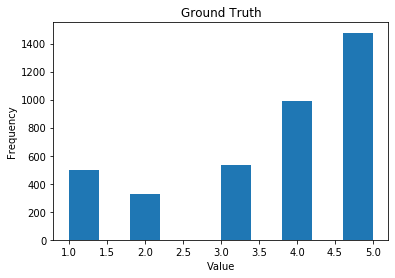

In [54]:
getHistogram('ratingScore', 'Ground Truth')

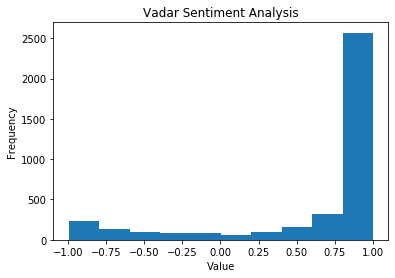

In [55]:
getHistogram('vader', 'Vadar Sentiment Analysis')

In [56]:
finaldf.head()

,hotelName,ratingScore,groundTruth,reviewCol,vader,room,hotel,stay,clean,staff,breakfast,would,good,rooms,great,friendly,stayed,nice,one,night,comfortable,desk,well,area,front,place,bed,like,time,pool,nthe,could,get,back,also,helpful,service,inn,check,even,...,park,maintained,efficient,name,party,tired,heat,screen,trying,site,gym,behind,walked,welcome,disgusting,floors,four,closed,facility,whole,table,star,machine,stains,window,online,conference,saturday,certainly,reason,muffins,absolutely,courteous,received,yogurt,weeks,hilton,half,later,event
0,The Key Motel,5,positive,"""Stayed here with my family, we got 4 rooms bo...",0.9895,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Key Motel,5,positive,"""My family and I spent 2 nights at Key Motel d...",0.9847,1,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Key Motel,4,positive,"""The owners of the Key Motel where very welcom...",0.9538,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Key Motel,4,positive,"""I have stayed at this place twice. Its an old...",0.9682,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,The Key Motel,3,negative,"""This motel is nice small town suprise.My room...",0.8750,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Numbers of reviews per hotel

In [0]:
def reviews_num(dataframe):
    plt.figure()
    dataframe[['reviewCol']].groupby(finaldf['hotelName']).agg(['count']).plot(kind='bar',figsize=[20,8],legend=None)

<Figure size 432x288 with 0 Axes>

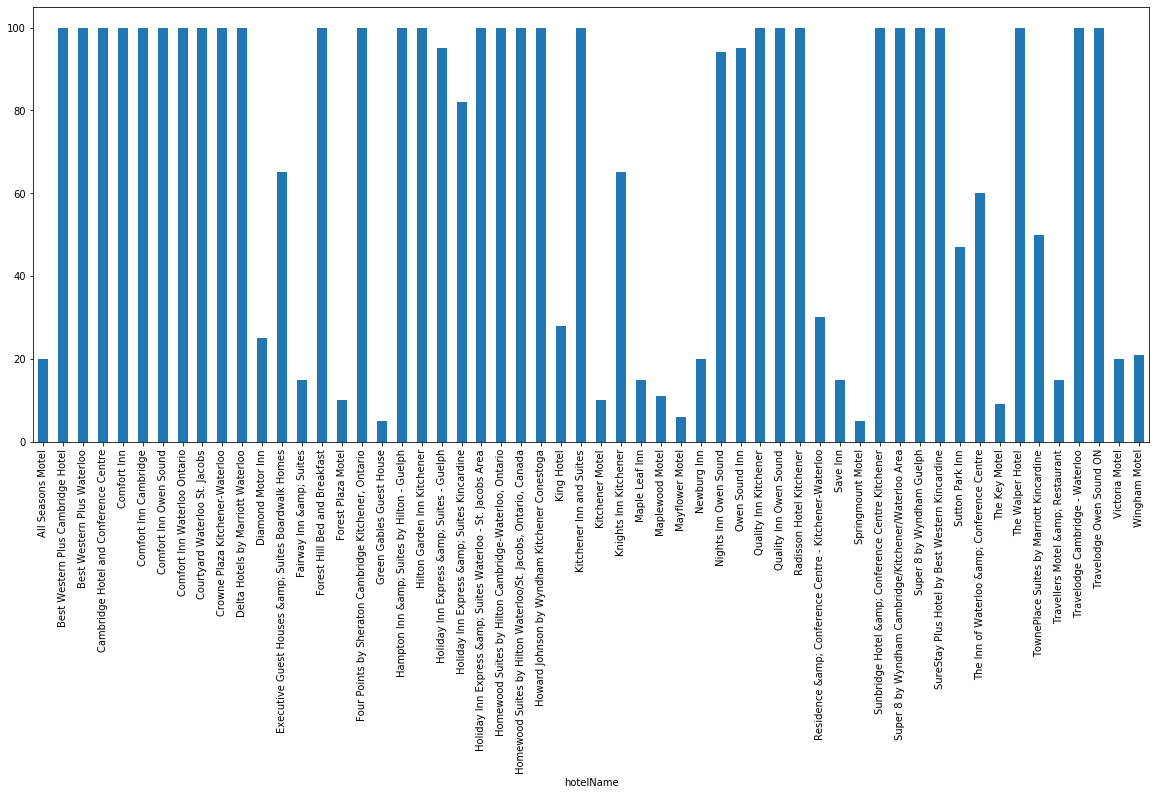

In [58]:
reviews_num(finaldf)

###(b) Boxplot

In [59]:
#Extract a list of hotels
hotelNames = finaldf['hotelName'].unique()
hotelNames

array(['The Key Motel',
       'Four Points by Sheraton Cambridge Kitchener, Ontario',
       'Best Western Plus Cambridge Hotel', 'Comfort Inn Cambridge',
       'Super 8 by Wyndham Cambridge/Kitchener/Waterloo Area',
       'Travelodge Cambridge - Waterloo', 'Hilton Garden Inn Kitchener',
       'Homewood Suites by Hilton Cambridge-Waterloo, Ontario',
       'Cambridge Hotel and Conference Centre', 'Comfort Inn',
       'Super 8 by Wyndham Guelph',
       'Holiday Inn Express &amp; Suites - Guelph',
       'Hampton Inn &amp; Suites by Hilton - Guelph', 'Wingham Motel',
       'Forest Plaza Motel',
       'The Inn of Waterloo &amp; Conference Centre',
       'Courtyard Waterloo St. Jacobs', 'Comfort Inn Waterloo Ontario',
       'Best Western Plus Waterloo',
       'Holiday Inn Express &amp; Suites Waterloo - St. Jacobs Area',
       'Homewood Suites by Hilton Waterloo/St. Jacobs, Ontario, Canada',
       'Delta Hotels by Marriott Waterloo', 'Nights Inn Owen Sound',
       'Comfort In

In [0]:
def getHotelRank(df, measure='ratingScore'):
    #Rank the hotel by ground truth rating score
    hotelRating = []
    for hotel in hotelNames:
        itemDf = df.loc[df['hotelName']==hotel]
        hotelRating.append([hotel,itemDf[measure].mean()])
    hotelRatingDfGt = pandas.DataFrame(hotelRating)
    hotelRatingDfGt.columns=['hotelName','avgRatingScore']
    hotelRatingDfGt = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0)
    return hotelRatingDfGt

In [0]:
hotelRatingDfGt = getHotelRank(finaldf)
hotelRatingDfVd = getHotelRank(finaldf, measure='vader')

In [62]:
print(hotelRatingDfGt)

                                            hotelName  avgRatingScore
31                      Forest Hill Bed and Breakfast        4.980000
42                           Green Gables Guest House        4.800000
20  Homewood Suites by Hilton Waterloo/St. Jacobs,...        4.730000
39  Executive Guest Houses &amp; Suites Boardwalk ...        4.661538
21                  Delta Hotels by Marriott Waterloo        4.490000
46        Holiday Inn Express &amp; Suites Kincardine        4.463415
19  Holiday Inn Express &amp; Suites Waterloo - St...        4.420000
52                                         King Hotel        4.392857
37                                   The Walper Hotel        4.330000
2                   Best Western Plus Cambridge Hotel        4.210000
7   Homewood Suites by Hilton Cambridge-Waterloo, ...        4.170000
43                           Kitchener Inn and Suites        4.150000
22                              Nights Inn Owen Sound        4.127660
16                  

In [63]:
print(hotelRatingDfVd)

                                            hotelName  avgRatingScore
42                           Green Gables Guest House        0.968020
31                      Forest Hill Bed and Breakfast        0.963054
39  Executive Guest Houses &amp; Suites Boardwalk ...        0.915405
54                                    Maplewood Motel        0.892882
20  Homewood Suites by Hilton Waterloo/St. Jacobs,...        0.874032
21                  Delta Hotels by Marriott Waterloo        0.854793
52                                         King Hotel        0.847904
46        Holiday Inn Express &amp; Suites Kincardine        0.842124
37                                   The Walper Hotel        0.808444
19  Holiday Inn Express &amp; Suites Waterloo - St...        0.805271
47     SureStay Plus Hotel by Best Western Kincardine        0.778373
2                   Best Western Plus Cambridge Hotel        0.775674
7   Homewood Suites by Hilton Cambridge-Waterloo, ...        0.769374
22                  

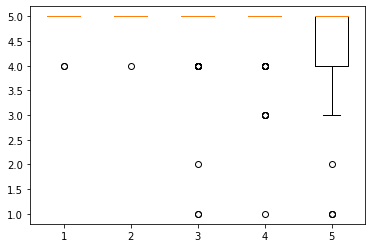

In [64]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].values

rank1 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['ratingScore']
rank2 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['ratingScore']
rank3 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['ratingScore']
rank4 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['ratingScore']
rank5 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['ratingScore']

data = [rank1, rank2, rank3, rank4, rank5]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


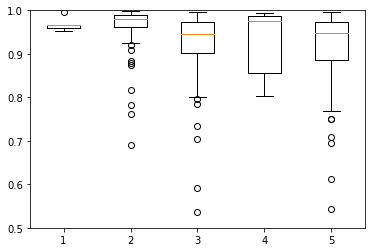

In [65]:
#Plot top 5 side-by-side boxplot for top 5 vader hotel
tp5vdhotel = hotelRatingDfVd.sort_values('avgRatingScore',ascending=0).head(5)
tp5vdhotel['hotelName'].as_matrix()

r1 = finaldf.loc[finaldf['hotelName'] == tp5vdhotel['hotelName'].as_matrix()[0]]['vader']
r2 = finaldf.loc[finaldf['hotelName'] == tp5vdhotel['hotelName'].as_matrix()[1]]['vader']
r3 = finaldf.loc[finaldf['hotelName'] == tp5vdhotel['hotelName'].as_matrix()[2]]['vader']
r4 = finaldf.loc[finaldf['hotelName'] == tp5vdhotel['hotelName'].as_matrix()[3]]['vader']
r5 = finaldf.loc[finaldf['hotelName'] == tp5vdhotel['hotelName'].as_matrix()[4]]['vader']

data_vd = [r1, r2, r3, r4, r5]
# multiple box plots on one figure
plt.figure()
plt.ylim([0.5,1])
plt.boxplot(data_vd)
plt.show()

Mean and Variance

In [0]:
def mvcal(data):
    values =[]
    for each in data:
        values.append([each.mean(),each.var()])
    values_df = pandas.DataFrame(values)
    values_df.columns = ['mean','variance']
    return values_df

In [67]:
#Ground Truth
gt_stats_df = mvcal(data)
gt_stats_df

,mean,variance
0,4.980000,0.019798
1,4.800000,0.200000
2,4.730000,0.502121
3,4.661538,0.571154
4,4.490000,0.777677


In [68]:
#Vader
vd_stats_df = mvcal(data_vd)
vd_stats_df

,mean,variance
0,0.968020,0.000286
1,0.963054,0.002411
2,0.915405,0.008425
3,0.892882,0.029219
4,0.874032,0.069110


###(c) Scatter Plot and Heat Map

Text(0.5, 0, 'Vader Score')

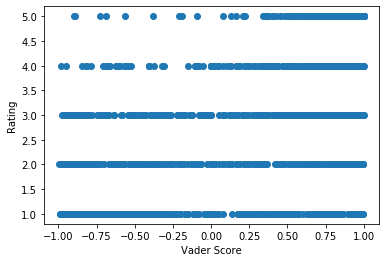

In [69]:
y = finaldf['ratingScore'].values
x = finaldf['vader'].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

In [0]:
from scipy.stats.kde import gaussian_kde

In [0]:
def heatmap(x,y,x_label='Vader Score', y_label='Rating'):
    k = gaussian_kde(np.vstack([x, y]))
    xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    fig = plt.figure(figsize=(6,8))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
    ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

    ax1.set_xlim(x.min(), x.max())
    ax1.set_ylim(y.min(), y.max())
    ax2.set_xlim(x.min(), x.max())
    ax2.set_ylim(y.min(), y.max())


    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)

    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)

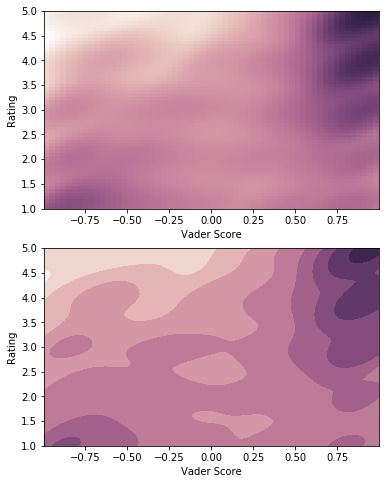

In [72]:
heatmap(x,y)

Text(0.5, 0, 'Length')

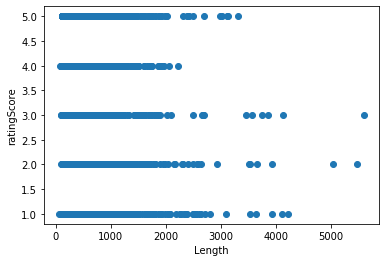

In [73]:
#rating versus review length
plt.plot(finaldf['reviewCol'].str.len(), y,"o")
plt.ylabel('ratingScore')
plt.xlabel('Length')

Text(0.5, 0, 'Length')

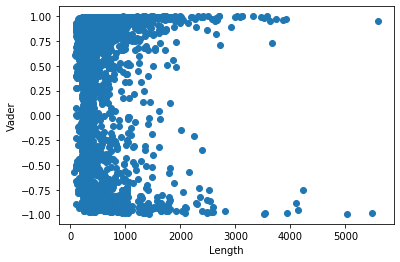

In [74]:
#rating versus review length
plt.plot(finaldf['reviewCol'].str.len(), x,"o")
plt.ylabel('Vader')
plt.xlabel('Length')

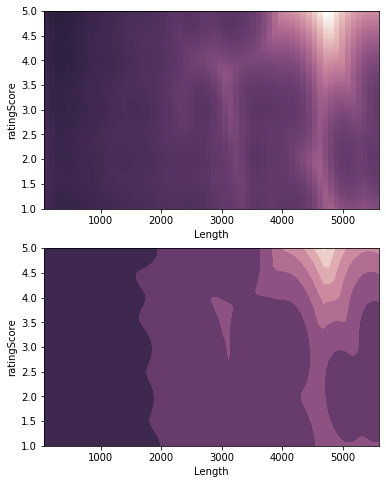

In [75]:
heatmap(finaldf['reviewCol'].str.len(),y,x_label='Length',y_label='ratingScore')

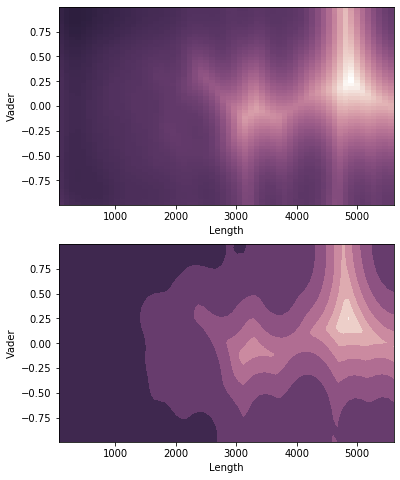

In [76]:
heatmap(finaldf['reviewCol'].str.len(),x,x_label='Length',y_label='Vader')

In [0]:

itemAnalysisDf = finaldf[['hotelName','groundTruth','ratingScore','vader']]

In [0]:
hotelAnalysisDf = itemAnalysisDf.groupby('hotelName', as_index=True).mean()

In [79]:
hotelAnalysisDf

,ratingScore,vader
hotelName,,
All Seasons Motel,2.400000,0.273755
Best Western Plus Cambridge Hotel,4.210000,0.775674
Best Western Plus Waterloo,3.820000,0.648132
Cambridge Hotel and Conference Centre,3.900000,0.712337
Comfort Inn,3.750000,0.681760
Comfort Inn Cambridge,3.330000,0.492861
Comfort Inn Owen Sound,3.670000,0.685153
Comfort Inn Waterloo Ontario,3.560000,0.651014
Courtyard Waterloo St. Jacobs,4.120000,0.728742


In [0]:
count=finaldf[['reviewCol']].groupby(finaldf['hotelName']).count()

In [81]:
count

,reviewCol
hotelName,
All Seasons Motel,20
Best Western Plus Cambridge Hotel,100
Best Western Plus Waterloo,100
Cambridge Hotel and Conference Centre,100
Comfort Inn,100
Comfort Inn Cambridge,100
Comfort Inn Owen Sound,100
Comfort Inn Waterloo Ontario,100
Courtyard Waterloo St. Jacobs,100


In [0]:
import pandas as pd

In [0]:
hotelrvdCount=pd.concat([hotelAnalysisDf,count], axis=1)

In [84]:
hotelrvdCount

,ratingScore,vader,reviewCol
hotelName,,,
All Seasons Motel,2.400000,0.273755,20
Best Western Plus Cambridge Hotel,4.210000,0.775674,100
Best Western Plus Waterloo,3.820000,0.648132,100
Cambridge Hotel and Conference Centre,3.900000,0.712337,100
Comfort Inn,3.750000,0.681760,100
Comfort Inn Cambridge,3.330000,0.492861,100
Comfort Inn Owen Sound,3.670000,0.685153,100
Comfort Inn Waterloo Ontario,3.560000,0.651014,100
Courtyard Waterloo St. Jacobs,4.120000,0.728742,100


Text(0.5, 0, 'Number of Reviews')

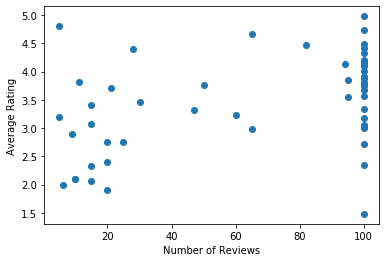

In [85]:
#Number of Reviews versus Average rating
plt.plot(hotelrvdCount['reviewCol'], hotelrvdCount['ratingScore'],"o")
plt.ylabel('Average Rating')
plt.xlabel('Number of Reviews')

Text(0.5, 0, 'Number of Reviews')

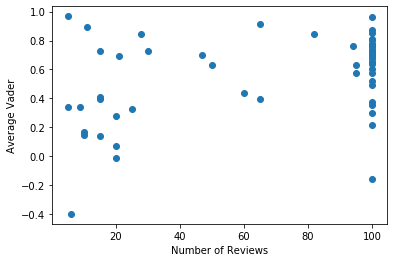

In [86]:
#Number of reviews versus average vader
plt.plot(hotelrvdCount['reviewCol'], hotelrvdCount['vader'],"o")
plt.ylabel('Average Vader')
plt.xlabel('Number of Reviews')

There isnt a very clear trend in number of number of reviews versus average rating or average vader. However, we can see that the hotels have more reviews tends to have higher average rating or higher average vader. 